# BlueBox

Create simple timeline plots with flexible control of the output styles based on different attributes.

To make your own plots, clone [this repo](https://github.com/dkirkby/bluebox.git) and edit this notebook. The required packages are: pandas, matplotlib, numpy.

To add or correct a project description in this repo, please [create an issue](https://github.com/dkirkby/bluebox/issues/new) or make a pull request.

In [1]:
%matplotlib inline

In [2]:
from bluebox.io import load
from bluebox.plot import Style, timeline

A group of items are described in a text file, e.g.

In [3]:
!head -5 CMB.txt

 name          | start   | duration  | location      | method     | status    | ramp_up  | ramp_down  | row
 PLANCK        | 2009.5  | 4.3       | Space         | Microwave  | Approved  |          |            |
 SPIDER-2      | 2021.9  | 0.2       | Balloon       | Microwave  | Approved  |          |            |
 BFORE         | 2025.9  | 0.2       | Balloon       | Microwave  | Proposed  |          |            |
 LiteBIRD      | 2027.0  | 3.0       | Space         | Microwave  | Approved  |          |            |


Load these text files as pandas dataframes:

In [4]:
CMB = load("CMB.txt")
LSS = load("LSS.txt")

Draw a timeline with fill color based on the instrumentation method and edgecolor and alpha based on approval status:

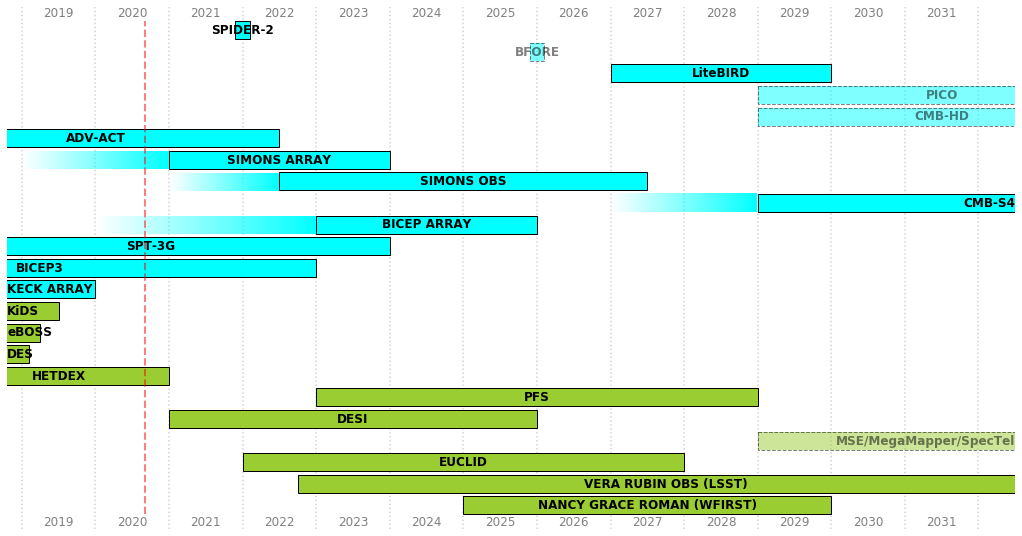

In [5]:
timeline(
    CMB, LSS,
    fillcolor=Style('method', Spectro='yellowgreen', Imaging='yellowgreen', Microwave='cyan'),
    edgestyle=Style('status', Approved='-', Proposed='--'),
    alpha=Style('status', Approved=1, Proposed=0.5),
)

Change the fillcolor to indicate location:

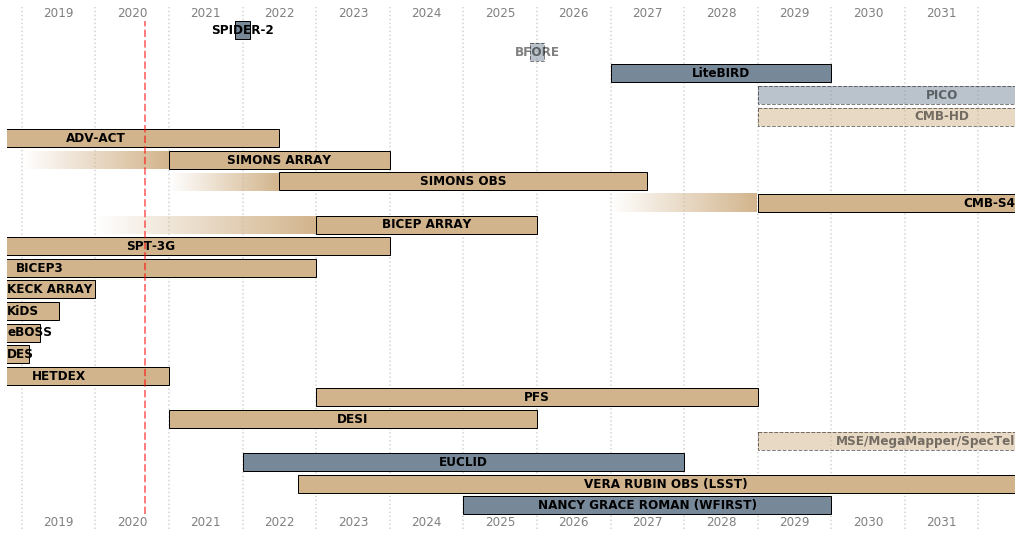

In [6]:
timeline(
    CMB, LSS,
    fillcolor=Style('location', Atacama='tan', Pole='tan', Ground='tan', Space='lightslategray', Balloon='lightslategray'),
    edgestyle=Style('status', Approved='-', Proposed='--'),
    alpha=Style('status', Approved=1, Proposed=0.5)
)

Isolate the CMB projects and split CMB-S4 to show it dual locations. Use more vertical space with `item_height` and `item_space`:

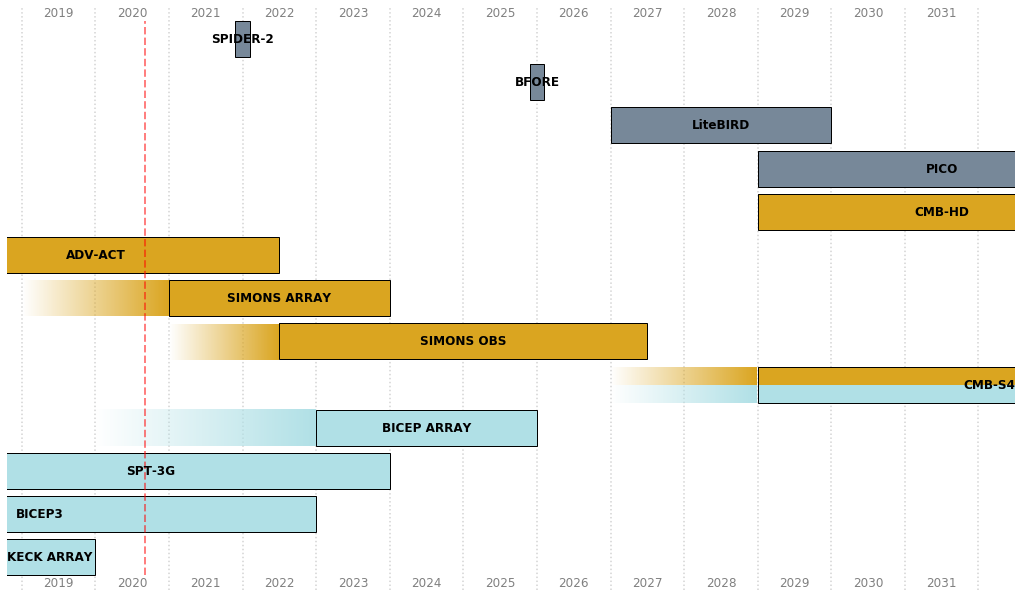

In [7]:
timeline(
    CMB,
    item_height=0.5,  item_space=0.1,
    fillcolor=Style('location', Atacama='goldenrod', Pole='powderblue', Space='lightslategray', Balloon='lightslategray', split=True),
)

Isolate the LSS projects and split Euclid and Roman to show their hybrid instrumentation. Remove the vertical red line with `now=None`:

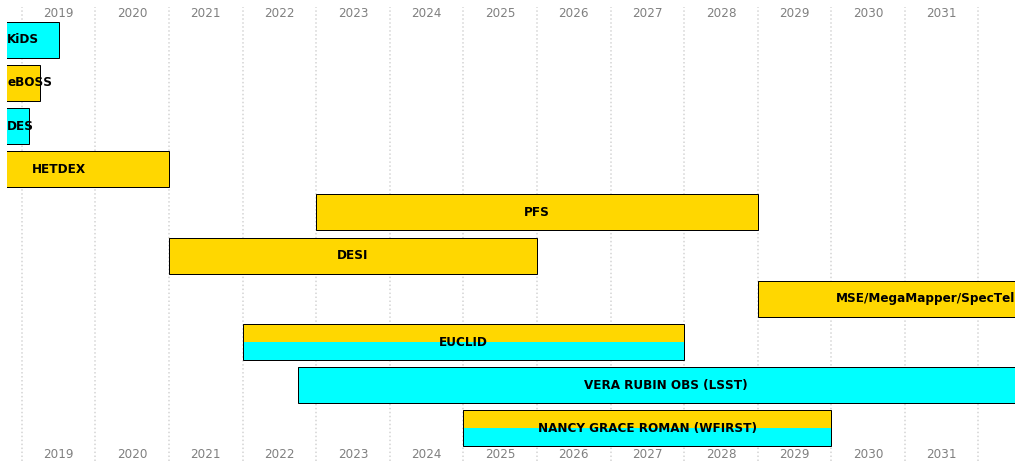

In [8]:
timeline(
    LSS,
    item_height=0.5,  item_space=0.1, now=None,
    fillcolor=Style('method', Imaging='cyan', Spectro='gold', legend='color', split=True),
)